In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set()


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df_train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [3]:
df_train.shape

(891, 12)

Mengecek null value

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


||| Target Variabel |||

In [5]:
survived_train = df_train['Survived']

In [6]:
data = df_train.drop(["Survived"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### get_dummies
* untuk mengubah kategorikal data menjadi numerikal

In [8]:
data_dummy1 = pd.get_dummies(data, columns=["Sex"], drop_first=True)
data_dummy1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
data_5_vars = data_dummy1[["Sex_male", "Fare", "Age", "Pclass","SibSp"]]
data_5_vars.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [10]:
data_5_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  891 non-null    uint8  
 1   Fare      891 non-null    float64
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.8 KB


## Split Data

In [11]:
X = data_5_vars.values
y = survived_train.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [12]:
X_train.shape

(596, 5)

In [13]:
X_test.shape

(295, 5)

In [20]:
dep = np.arange(1,9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

## Fitting Data

In [21]:
for i, k in enumerate(dep):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    
    clf.fit(X_train, y_train)
    
    train_accuracy[i] = clf.score(X_train, y_train)
    
    test_accuracy[i] = clf.score(X_test, y_test)
    

Untuk mengambil depth/kedalaman yang digunakan untuk menggunakan decission tree, ambil titik dimana tingkat akurasinya mulai meningkat

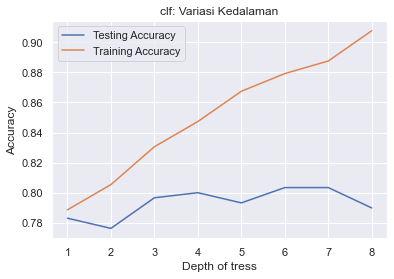

In [22]:
plt.title('clf: Variasi Kedalaman')
plt.plot(dep, test_accuracy, label= 'Testing Accuracy')
plt.plot(dep, train_accuracy, label= 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tress')
plt.ylabel('Accuracy')
plt.show()

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6)

In [24]:
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       182
           1       0.87      0.73      0.80       113

    accuracy                           0.86       295
   macro avg       0.86      0.83      0.84       295
weighted avg       0.86      0.86      0.85       295



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[170,  12],
       [ 30,  83]])

In [26]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)


In [27]:
graph = graphviz.Source(dot_data)
graph.render("Titanic_2")

'Titanic_2.pdf'

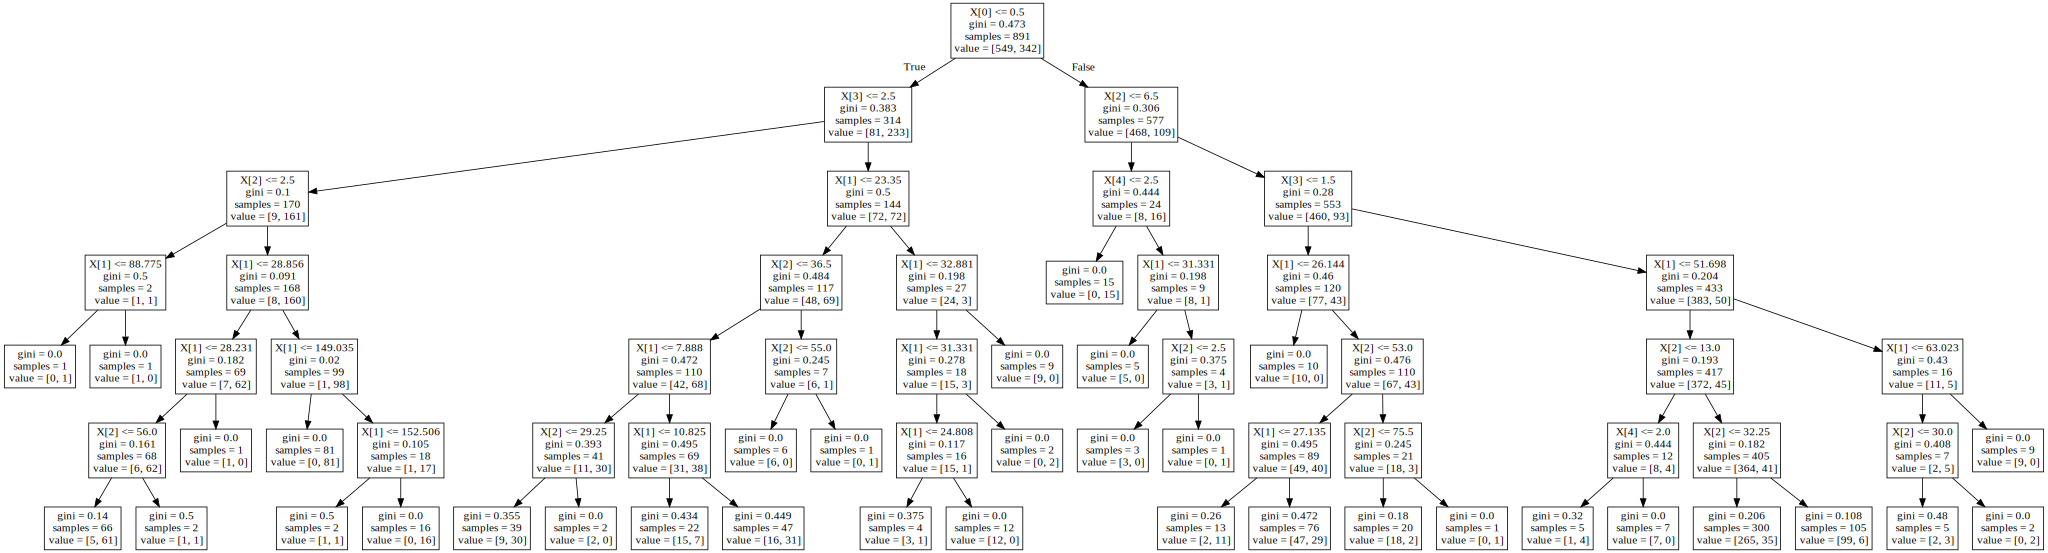

In [28]:
graph